In [1]:
import os
import gc
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



import tensorflow as tf

parent_dir = os.path.abspath('..')
sys.path.insert(0, parent_dir)
from utils.helper import fn_plot_tf_hist

In [2]:
PATIENCE = 20
LR_FACTOR = .2
LR_PATIENCE = 5


In [3]:
inpDir = os.path.join('..', 'input')
outDir = '../output'
modelDir = os.path.join('..', 'model')


EPOCHS = 100
ALPHA = .001
TEST_SIZE = .2


BATCH_SIZE = 64
RANDOM_STATE = 24 # for initialization ----- REMEMBER: to remove at the time of promotion to production
np.random.RandomState(RANDOM_STATE) # Set Random Seed for reproducible results
tf.random.set_seed(RANDOM_STATE) ######

# parameters for Matplotlib
params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

CMAP = 'brg' # plt.cm.Spectral

plt.rcParams.update(params)

## define data


In [5]:
start = -2.1
end = 2.1

delta = .0005 # spacing

X_train = np.arange(start, end+delta, delta)
y_rnd = np.random.rand(X_train.shape[0]) - .5 # random noise we are making to add 

y_true = 2 + np.square(X_train) + 2 * np.sin(np.pi * X_train)#signal


y_train = 2 * y_rnd + y_true
X_train

# test data
X_test = np.arange(start, end+delta, delta*10)
y_rnd = np.random.rand(X_test.shape[0]) - .5 # random noise we are making to add 

y_true_test = 2 + np.square(X_test) + 2 * np.sin(np.pi * X_test)#signal


y_test = 2 * y_rnd + y_true_test
X_test.shape, X_train.shape, y_test.shape, y_train.shape

((841,), (8401,), (841,), (8401,))

In [6]:
8401/BATCH_SIZE

131.265625

In [7]:
num_sample = 131 * BATCH_SIZE
num_sample

8384

In [8]:
# changing the shape of X_train so that it is multiple of batch_size so that we get equal batch sizes when we fetch them 

In [9]:
X_train = X_train[:num_sample]
y_train = y_train[:num_sample]
y_true = y_true[:num_sample]
X_test.shape, X_train.shape, y_test.shape, y_train.shape

((841,), (8384,), (841,), (8384,))

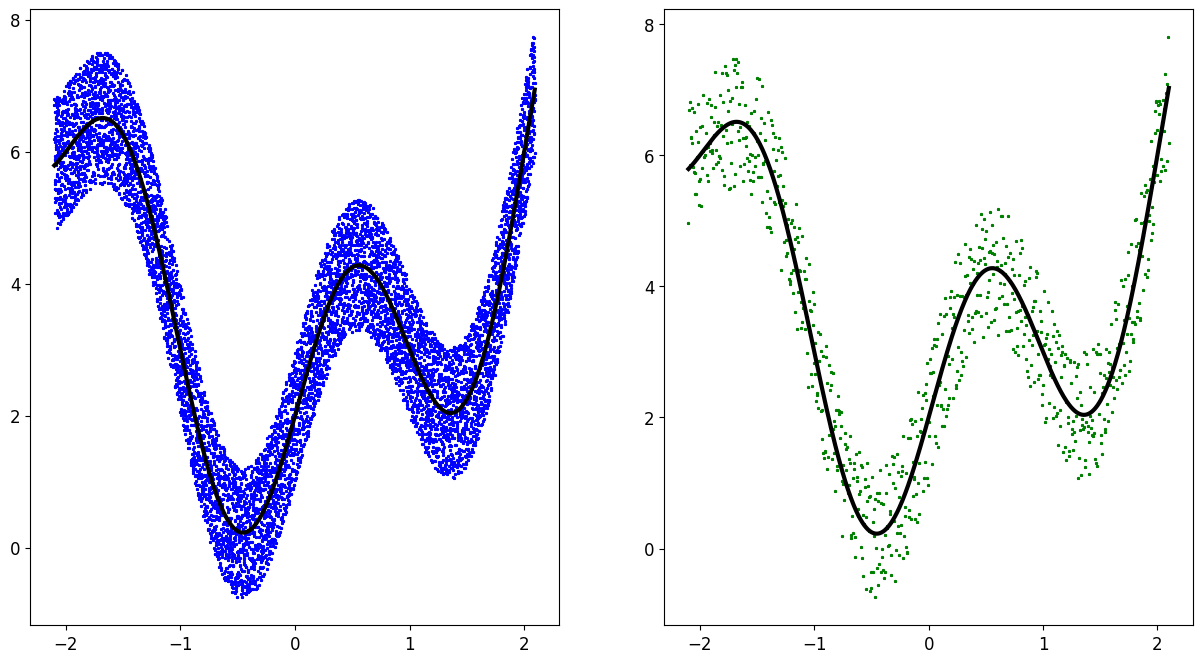

In [10]:
fig, axes = plt.subplots(1,2)
ax = axes[0]
ax.plot(X_train, y_train, 'b*', markersize = 2, label = 'Train')
ax.plot(X_train, y_true, c = 'k', linewidth = 3, label = 'True')

ax = axes[1]
ax.plot(X_test, y_test, 'g*', markersize = 2, label = 'Test')
ax.plot(X_test, y_true_test, c = 'k', linewidth = 3, label = 'True_test');

In [11]:
inputs = tf.keras.layers.Input(shape = (1, ))

x = tf.keras.layers.Dense(128, 
                          activation = tf.keras.activations.relu,
                          name = 'fc_1') (inputs)

x  = tf.keras.layers.Dense(64, 
                           activation = tf.keras.activations.relu,
                           name = 'fc_2') (x)

outputs = tf.keras.layers.Dense(1, name = 'fc_3') (x)

model = tf.keras.Model(inputs = inputs, outputs = outputs)

model.summary()
                                

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_1 (Dense)                    │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_2 (Dense)                    │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_3 (Dense)                    │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,577 (33.50 KB)

 Trainable params: 8,577 (33.50 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# loss_fn = tf.keras.losses


model.compile(optimizer = 'adam', 
              loss = 'mean_squared_error',
              metrics = ['mae']) # mean absolute error

history = model.fit(X_train, y_train, validation_data= [X_test, y_test], epochs = EPOCHS, verbose = 2)

Epoch 1/100
262/262 - 3s - 10ms/step - loss: 3.0352 - mae: 1.3700 - val_loss: 1.4021 - val_mae: 0.9949
Epoch 2/100
262/262 - 1s - 2ms/step - loss: 1.1768 - mae: 0.8901 - val_loss: 0.9341 - val_mae: 0.7827
Epoch 3/100
262/262 - 1s - 2ms/step - loss: 0.8674 - mae: 0.7409 - val_loss: 0.8052 - val_mae: 0.7184
Epoch 4/100
262/262 - 1s - 2ms/step - loss: 0.7594 - mae: 0.6913 - val_loss: 0.7166 - val_mae: 0.6776
Epoch 5/100
262/262 - 1s - 2ms/step - loss: 0.6711 - mae: 0.6536 - val_loss: 0.6312 - val_mae: 0.6405
Epoch 6/100
262/262 - 1s - 2ms/step - loss: 0.5877 - mae: 0.6181 - val_loss: 0.5491 - val_mae: 0.6072
Epoch 7/100
262/262 - 1s - 2ms/step - loss: 0.5124 - mae: 0.5858 - val_loss: 0.4778 - val_mae: 0.5778
Epoch 8/100
262/262 - 1s - 2ms/step - loss: 0.4535 - mae: 0.5596 - val_loss: 0.4275 - val_mae: 0.5544
Epoch 9/100
262/262 - 1s - 2ms/step - loss: 0.4140 - mae: 0.5412 - val_loss: 0.3952 - val_mae: 0.5367
Epoch 10/100
262/262 - 1s - 2ms/step - loss: 0.3912 - mae: 0.5300 - val_loss: 0.3

In [13]:
loss_df = pd.DataFrame(history.history)

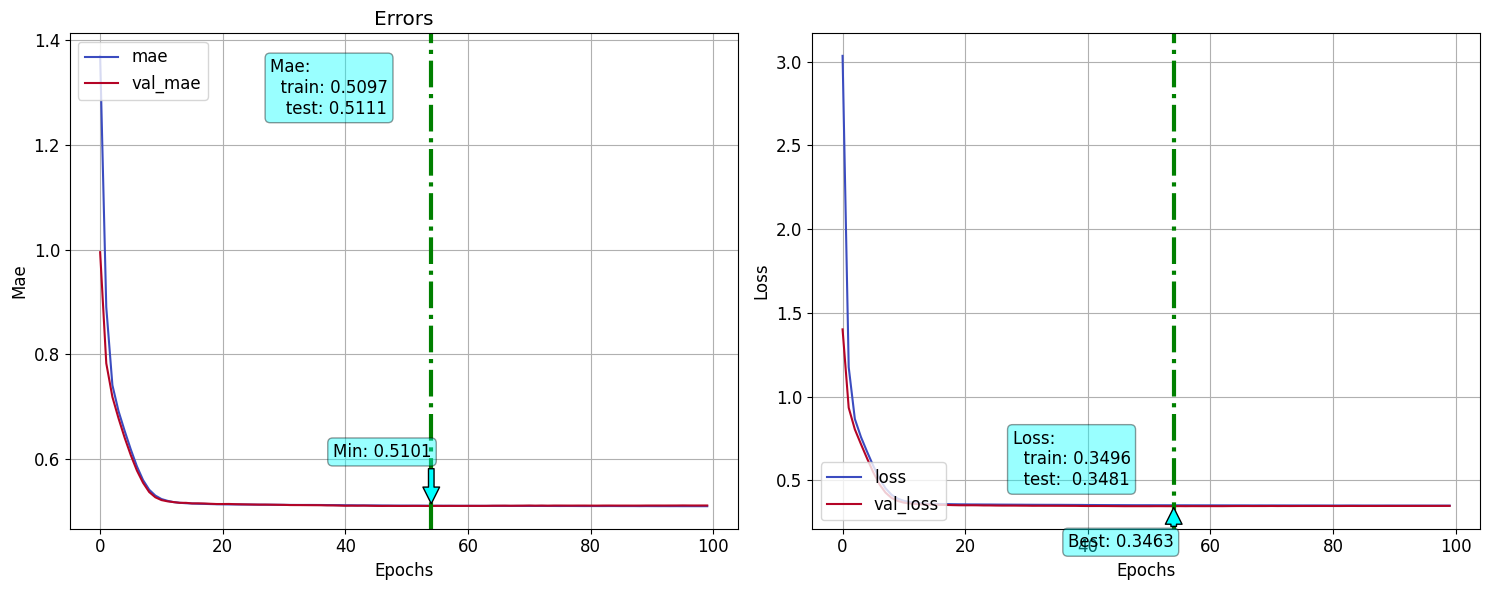

In [14]:
fn_plot_tf_hist(loss_df)

In [15]:
error = model.evaluate(X_test, y_test, verbose = 1)

print (f'Loss: {error[0]:.4f} MAE:{error[1]:.4f}')

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3288 - mae: 0.4895
Loss: 0.3481 MAE:0.5111


In [16]:
y_pred = model.predict(X_test)
result_df = pd.DataFrame({'pred' : y_pred[:,0], 'test': y_test})
result_df['true'] = y_true_test
result_df.head()

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


,pred,test,true
0,5.772401,4.973463,5.791966
1,5.780890,6.688510,5.800944
2,5.789380,6.808559,5.810118
3,5.797868,5.853372,5.819479
4,5.806358,6.282883,5.829020


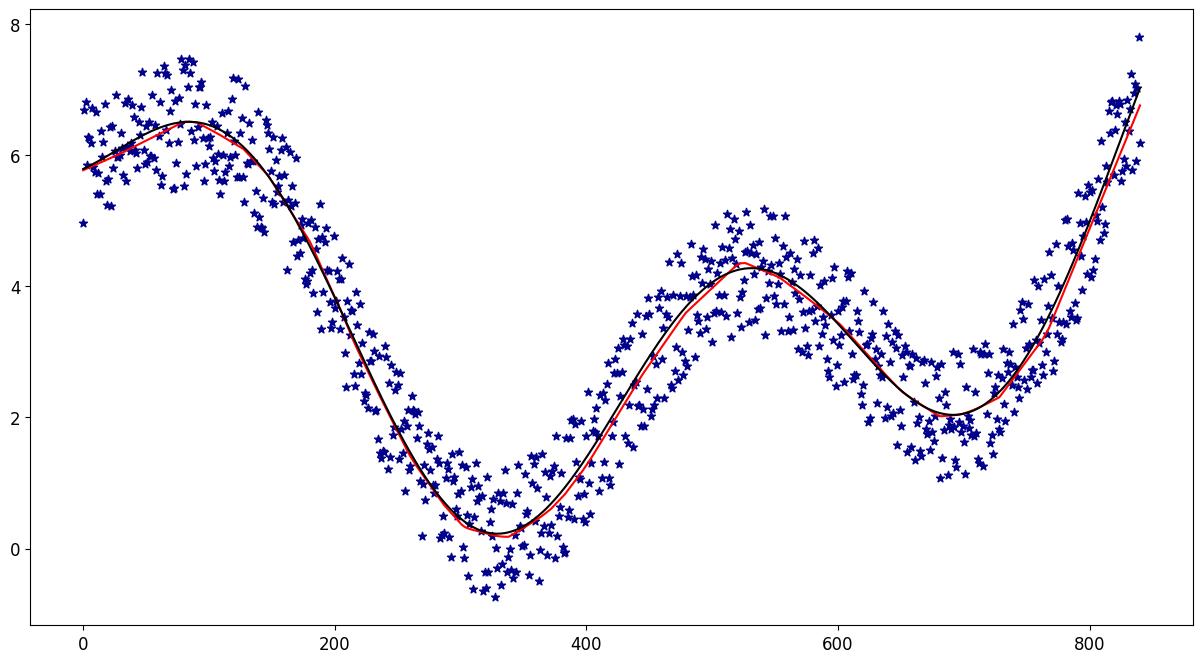

In [17]:
ax= result_df.pred.plot(c = 'r', label ='pred')
ax= result_df.true.plot(c = 'k',ax = ax,  label ='pred')

plt.scatter(result_df.index, result_df.test,marker = '*', c = 'DarkBlue')

In [38]:
df = pd.read_csv(r"C:\Users\dai.studentsdc\Desktop\dai 24 sep\Machine_Learning\Datasets\Boston.csv")

In [42]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [48]:
y = df.iloc[:, -1]
X = df.drop('medv', axis = 1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3)

In [54]:
X_train.shape

(354, 13)

In [62]:
num = 22 * 16

In [64]:
BATCH_SIZE = 16
X_train = X_train[: num]
y_train = y_train[: num]

In [66]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((352, 13), (152, 13), (352,), (152,))

In [68]:
inputs = tf.keras.layers.Input(shape = (13, ))

x = tf.keras.layers.Dense(128, 
                          activation = tf.keras.activations.relu,
                          name = 'fc_1') (inputs)

x  = tf.keras.layers.Dense(64, 
                           activation = tf.keras.activations.relu,
                           name = 'fc_2') (x)

outputs = tf.keras.layers.Dense(1, name = 'fc_3') (x)

model1 = tf.keras.Model(inputs = inputs, outputs = outputs)

model1.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_1 (Dense)                    │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_2 (Dense)                    │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_3 (Dense)                    │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
model1.compile(optimizer = 'adam', 
              loss = 'mean_squared_error',
              metrics = ['mae']) # mean absolute error

history = model1.fit(X_train, y_train, validation_data= [X_test, y_test], epochs = EPOCHS, verbose = 2)

Epoch 1/100
11/11 - 2s - 148ms/step - loss: 398.0818 - mae: 15.7571 - val_loss: 237.8893 - val_mae: 11.8890
Epoch 2/100
11/11 - 0s - 10ms/step - loss: 141.1280 - mae: 9.6191 - val_loss: 132.3304 - val_mae: 9.9024
Epoch 3/100
11/11 - 0s - 10ms/step - loss: 76.7255 - mae: 6.1901 - val_loss: 90.2475 - val_mae: 6.3522
Epoch 4/100
11/11 - 0s - 12ms/step - loss: 65.0901 - mae: 6.0860 - val_loss: 90.0446 - val_mae: 5.9497
Epoch 5/100
11/11 - 0s - 11ms/step - loss: 62.6435 - mae: 5.8040 - val_loss: 79.9825 - val_mae: 6.1804
Epoch 6/100
11/11 - 0s - 10ms/step - loss: 55.5948 - mae: 5.3329 - val_loss: 78.6496 - val_mae: 5.9968
Epoch 7/100
11/11 - 0s - 10ms/step - loss: 52.7294 - mae: 5.2365 - val_loss: 77.0061 - val_mae: 5.6070
Epoch 8/100
11/11 - 0s - 10ms/step - loss: 51.7260 - mae: 5.1850 - val_loss: 75.5340 - val_mae: 5.4718
Epoch 9/100
11/11 - 0s - 12ms/step - loss: 50.9328 - mae: 5.1718 - val_loss: 74.0972 - val_mae: 5.4149
Epoch 10/100
11/11 - 0s - 8ms/step - loss: 49.7293 - mae: 5.1088 -

In [72]:
loss_df = pd.DataFrame(history.history)

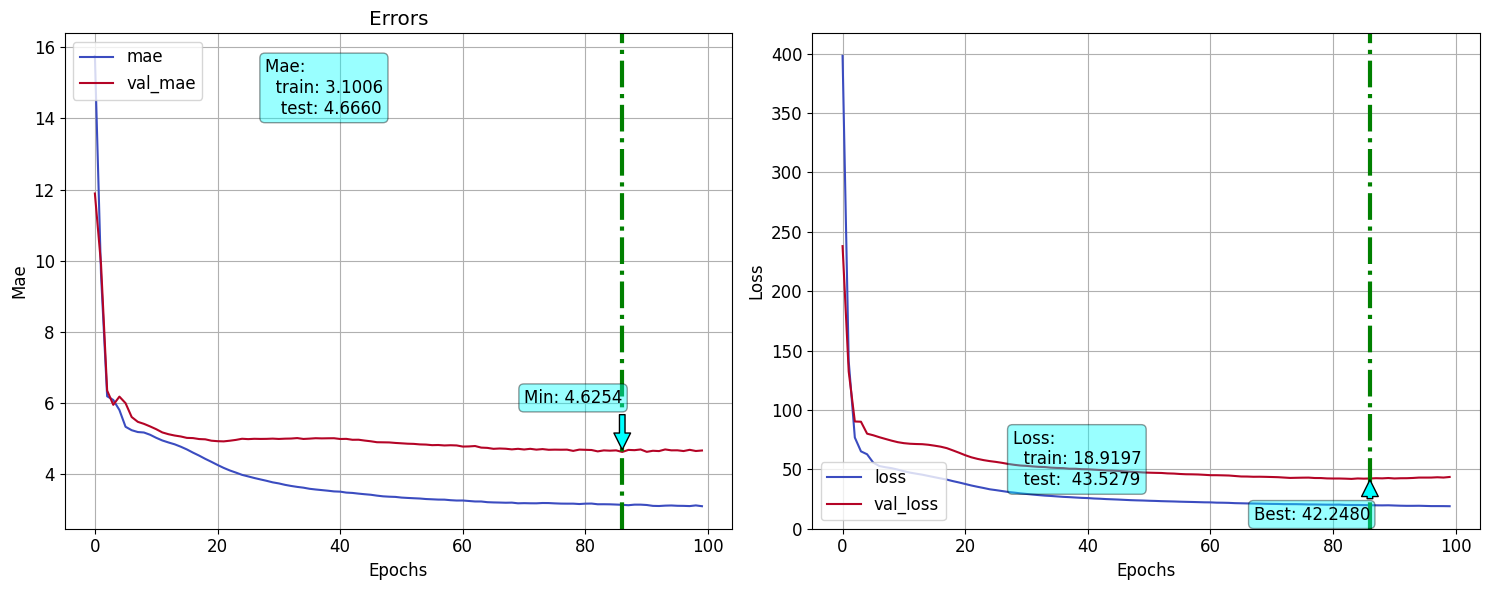

In [74]:
fn_plot_tf_hist(loss_df)

In [76]:
# we can conclude that it gives very bad accuracy i.e model performs bad in case of the regression models 